In [28]:
import pandas as pd
import numpy as np

In [29]:
# Importing dataset
df=pd.read_csv("final_wheat_data.csv")


In [30]:
df.head()

,commodity,category,item,item2,units,size,region,country,year,value,survey_base_year,note
0,Wheat,Gross value of production,"Primary product, grain","Primary product, grain",dollars per planted acre,No specific size,U.S. total,United States,1998,110.95,Base survey of 1998,NaN
1,Wheat,Gross value of production,"Primary product, grain","Primary product, grain",dollars per planted acre,No specific size,U.S. total,United States,1999,95.73,Base survey of 1998,NaN
2,Wheat,Gross value of production,"Primary product, grain","Primary product, grain",dollars per planted acre,No specific size,U.S. total,United States,2000,92.50,Base survey of 1998,NaN
3,Wheat,Gross value of production,"Primary product, grain","Primary product, grain",dollars per planted acre,No specific size,U.S. total,United States,2001,95.22,Base survey of 1998,NaN
4,Wheat,Gross value of production,"Primary product, grain","Primary product, grain",dollars per planted acre,No specific size,U.S. total,United States,2002,91.51,Base survey of 1998,NaN


In [31]:
df.shape

(6003, 12)

In [32]:
df.columns

Index(['commodity', 'category', 'item', 'item2', 'units', 'size', 'region',
       'country', 'year', 'value', 'survey_base_year', 'note'],
      dtype='object')

In [33]:
df.describe

<bound method NDFrame.describe of      commodity                   category                    item  \
0        Wheat  Gross value of production  Primary product, grain   
1        Wheat  Gross value of production  Primary product, grain   
2        Wheat  Gross value of production  Primary product, grain   
3        Wheat  Gross value of production  Primary product, grain   
4        Wheat  Gross value of production  Primary product, grain   
...        ...                        ...                     ...   
5998     Wheat       Production practices               Irrigated   
5999     Wheat       Production practices               Irrigated   
6000     Wheat       Production practices               Irrigated   
6001     Wheat       Production practices               Irrigated   
6002     Wheat       Production practices               Irrigated   

                             item2                     units  \
0           Primary product, grain  dollars per planted acre   
1        

In [34]:
for col in df.columns:
    print(col, df[col].nunique())

commodity 1
category 7
item 35
item2 35
units 5
size 1
region 9
country 1
year 27
value 3610
survey_base_year 5
note 3


In [35]:
df.drop(columns=['commodity', 'size', 'country','note'], inplace=True)


In [36]:
df.head(20)

,category,item,item2,units,region,year,value,survey_base_year
0,Gross value of production,"Primary product, grain","Primary product, grain",dollars per planted acre,U.S. total,1998,110.95,Base survey of 1998
1,Gross value of production,"Primary product, grain","Primary product, grain",dollars per planted acre,U.S. total,1999,95.73,Base survey of 1998
2,Gross value of production,"Primary product, grain","Primary product, grain",dollars per planted acre,U.S. total,2000,92.50,Base survey of 1998
3,Gross value of production,"Primary product, grain","Primary product, grain",dollars per planted acre,U.S. total,2001,95.22,Base survey of 1998
4,Gross value of production,"Primary product, grain","Primary product, grain",dollars per planted acre,U.S. total,2002,91.51,Base survey of 1998
5,Gross value of production,"Primary product, grain","Primary product, grain",dollars per planted acre,U.S. total,2003,126.48,Base survey of 1998
6,Gross value of production,"Primary product, grain","Primary product, grain",dollars per planted acre,U.S. total,2004,136.91,Base survey of 2004
7,Gross value of production,"Primary product, grain","Primary product, grain",dollars per planted acre,U.S. total,2005,126.48,Base survey of 2004
8,Gross value of production,"Primary product, grain","Primary product, grain",dollars per planted acre,U.S. total,2006,136.78,Base survey of 2004
9,Gross value of production,"Primary product, grain","Primary product, grain",dollars per planted acre,U.S. total,2007,196.35,Base survey of 2004


In [37]:
df.isnull().sum()


category            0
item                0
item2               0
units               0
region              0
year                0
value               0
survey_base_year    0
dtype: int64

In [38]:
df[['category','item','item2','units','region','year','value','survey_base_year']].dtypes


category             object
item                 object
item2                object
units                object
region               object
year                  int64
value               float64
survey_base_year     object
dtype: object

### FEATURE ENGINEERING

In [39]:
df_gross = (
    df[df['category'] == 'Gross value of production']
    .groupby(['year','region'])['value']
    .sum()
    .reset_index()
    .rename(columns={'value':'Gross_Value'})
)


In [40]:
df_operating = (
    df[df['category'] == 'Operating costs']
    .groupby(['year','region'])['value']
    .sum()
    .reset_index()
    .rename(columns={'value':'Total_Operating_Cost'})
)

In [41]:
df_overhead = (
    df[df['category'] == 'Allocated overhead costs']
    .groupby(['year','region'])['value']
    .sum()
    .reset_index()
    .rename(columns={'value':'Total_Overhead_Cost'})
)

In [42]:
df_final = (
    df_gross
    .merge(df_operating, on=['year','region'], how='left')
    .merge(df_overhead, on=['year','region'], how='left')
)

In [43]:
df_final.head()

,year,region,Gross_Value,Total_Operating_Cost,Total_Overhead_Cost
0,1998,Basin and Range,318.24,168.16,NaN
1,1998,Fruitful Rim,347.00,216.80,NaN
2,1998,Heartland,279.10,150.38,NaN
3,1998,Mississippi Portal,261.02,157.50,NaN
4,1998,Northern Crescent,384.56,148.92,NaN


In [44]:
df_final['Total_Overhead_Cost'] = df_final['Total_Overhead_Cost'].fillna(0)


In [45]:
df_final['Total_Cost'] = (
    df_final['Total_Operating_Cost'] + 
    df_final['Total_Overhead_Cost']
)

df_final['Profit'] = (
    df_final['Gross_Value'] - df_final['Total_Cost']
)


In [46]:
df_final.head()

,year,region,Gross_Value,Total_Operating_Cost,Total_Overhead_Cost,Total_Cost,Profit
0,1998,Basin and Range,318.24,168.16,0.0,168.16,150.08
1,1998,Fruitful Rim,347.00,216.80,0.0,216.80,130.20
2,1998,Heartland,279.10,150.38,0.0,150.38,128.72
3,1998,Mississippi Portal,261.02,157.50,0.0,157.50,103.52
4,1998,Northern Crescent,384.56,148.92,0.0,148.92,235.64


In [47]:
df_final.drop(
    columns=['Total_Operating_Cost', 'Total_Overhead_Cost'],
    inplace=True
)


In [48]:
df_final.head(9)

,year,region,Gross_Value,Total_Cost,Profit
0,1998,Basin and Range,318.24,168.16,150.08
1,1998,Fruitful Rim,347.00,216.80,130.20
2,1998,Heartland,279.10,150.38,128.72
3,1998,Mississippi Portal,261.02,157.50,103.52
4,1998,Northern Crescent,384.56,148.92,235.64
5,1998,Northern Great Plains,203.68,101.54,102.14
6,1998,Prairie Gateway,211.96,95.82,116.14
7,1998,Southern Seaboard,234.18,196.46,37.72
8,1998,U.S. total,228.54,114.82,113.72


In [49]:
df_final = df_final[df_final['region'] != 'U.S. total'].reset_index(drop=True)



In [50]:
df_final.shape

(174, 5)

In [51]:
df_final.to_excel("Wheat_cleaned_dataset.xlsx", index=False)


# VISUALIZING

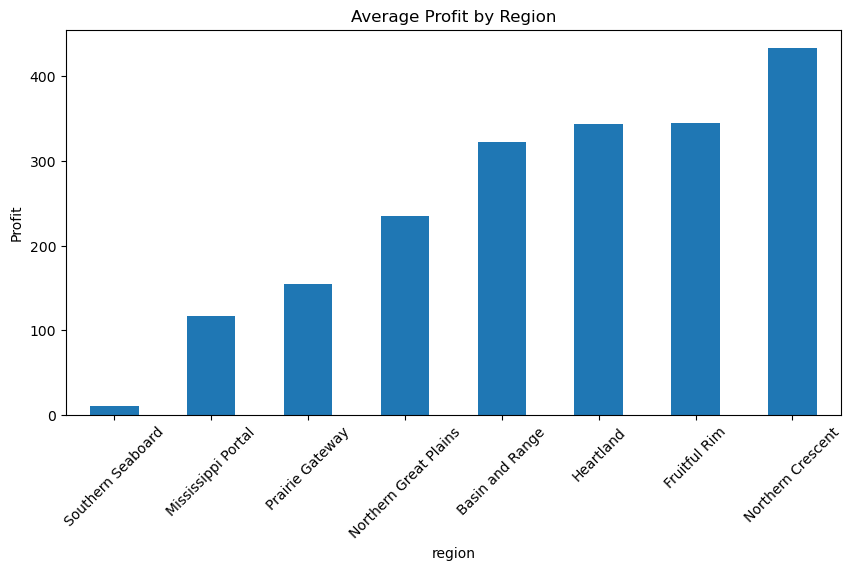

In [52]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
df_final.groupby('region')['Profit'].mean().sort_values().plot(kind='bar')
plt.title("Average Profit by Region")
plt.ylabel("Profit")
plt.xticks(rotation=45)
plt.show()


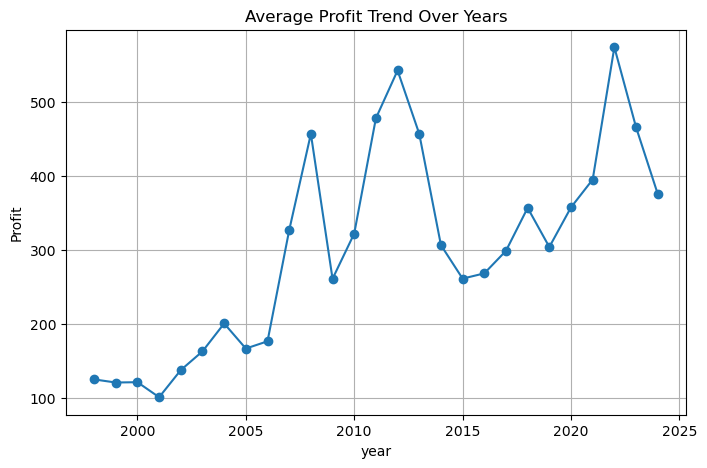

In [53]:
plt.figure(figsize=(8,5))
df_final.groupby('year')['Profit'].mean().plot(kind='line', marker='o')
plt.title("Average Profit Trend Over Years")
plt.ylabel("Profit")
plt.grid(True)
plt.show()


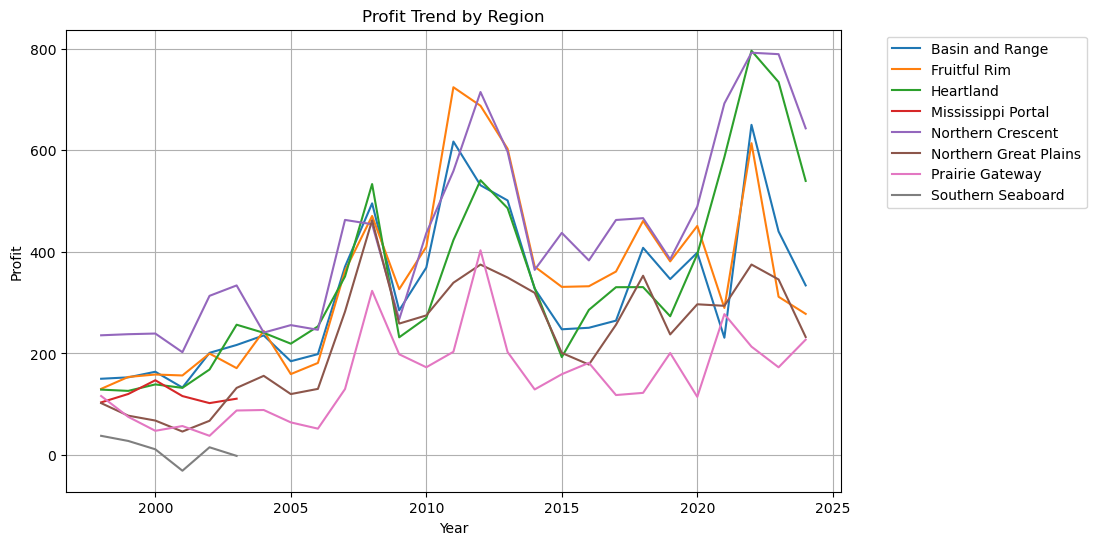

In [54]:
plt.figure(figsize=(10,6))

for region in df_final['region'].unique():
    temp = df_final[df_final['region'] == region]
    plt.plot(temp['year'], temp['Profit'], label=region)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("Profit Trend by Region")
plt.xlabel("Year")
plt.ylabel("Profit")
plt.grid(True)
plt.show()
